In [53]:
import pandas as pd
import pickle

data = pd.read_csv('loan.csv')
data.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP002305,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,1,LP001715,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,2,LP002086,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,3,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,1
4,4,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1


In [54]:
data = data.dropna()

In [55]:
data['Gender'] = data['Gender'].astype('category').cat.codes
data['Married'] = data['Married'].astype('category').cat.codes
data['Education'] = data['Education'].astype('category').cat.codes
data['Self_Employed'] = data['Self_Employed'].astype('category').cat.codes
data['Property_Area'] = data['Property_Area'].astype('category').cat.codes
data['Dependents'] = data['Dependents'].astype('category').cat.codes

predict = data['Loan_Status']
data = data.drop(['Unnamed: 0','Loan_ID','Loan_Status'], axis=1)


# Experiment 1

In [56]:
# from pycaret.classification import * 

In [57]:
# s = setup(data, target = 'Loan_Status', session_id = 123)

In [58]:
# compare_models()

In [59]:
# rc = create_model('nb')

In [60]:
# plot_model(rc)

In [61]:
# plot_model(rc, 'confusion_matrix')

# Experiment 2

In [62]:
# s2 = setup(data, target = 'Loan_Status', session_id = 123,
#            normalize = True,
#            polynomial_features = True, trigonometry_features = True, feature_interaction=True,)

In [63]:
# s2[0].columns

In [64]:
# classifier = create_model('nb')

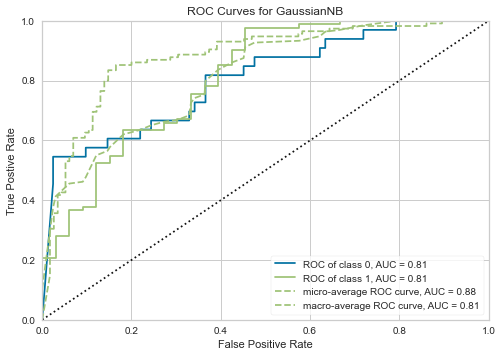

In [65]:
plot_model(classifier)

In [66]:
# save_model(lr, 'deployment_28042020')

In [67]:
# deployment_28042020 = load_model('deployment_28042020')

In [68]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(data, predict, test_size = 0.3, random_state = 0) 
  
# importing the random forest classifier model and training it on the dataset 
from sklearn.ensemble import RandomForestClassifier 
classifier = RandomForestClassifier() 
classifier.fit(X_train, y_train) 

y_pred = classifier.predict(X_test) 
  
# finding out the accuracy 
from sklearn.metrics import accuracy_score, f1_score
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.7652173913043478
0.8457142857142858


In [69]:
import pickle 
pickle_out = open("classifier.pkl", "wb") 
pickle.dump(classifier, pickle_out) 
pickle_out.close()

In [70]:
# import requests
# url = 'https://pycaret-insurance.herokuapp.com/predict_api'
# pred = requests.post(url,json={'age':55, 'sex':'male', 'bmi':59, 'children':1, 'smoker':'male', 'region':'northwest'})
# print(pred.json())